In [77]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [78]:
df = pd.read_csv('ai4i2020.csv')

In [3]:
df.shape

(10000, 14)

In [4]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [6]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


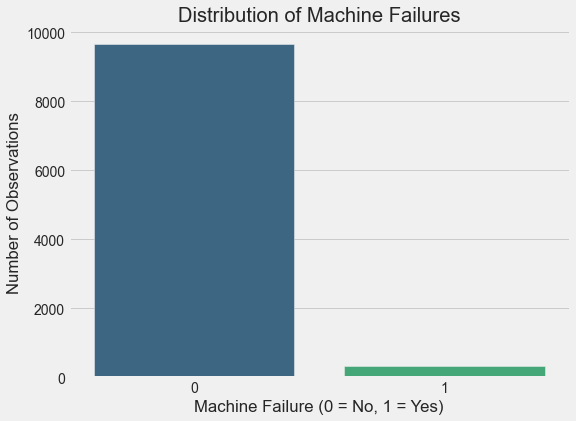

In [7]:
#类别不平衡可视化
plt.figure(figsize=(8, 6))
sns.countplot(x='Machine failure', data=df, palette='viridis')

plt.title('Distribution of Machine Failures')  
plt.xlabel('Machine Failure (0 = No, 1 = Yes)')  
plt.ylabel('Number of Observations')  
plt.show()

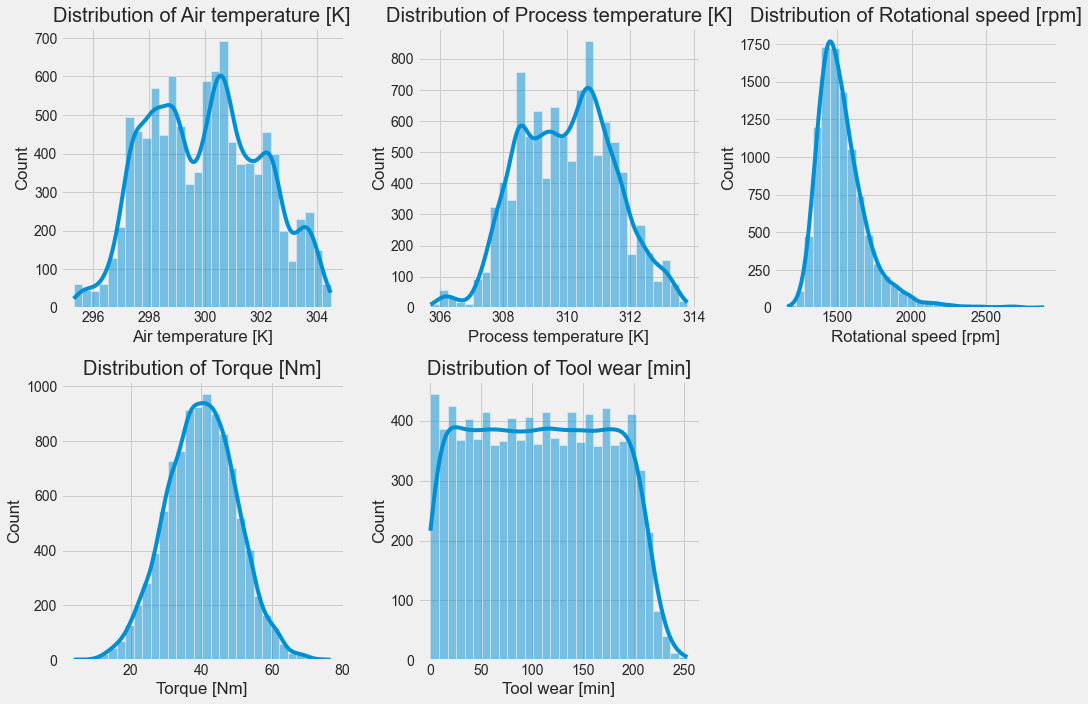

In [9]:
numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)  
    sns.histplot(data=df, x=feature, kde=True, bins=30) 
    plt.title(f'Distribution of {feature}')

plt.tight_layout() 
plt.show()

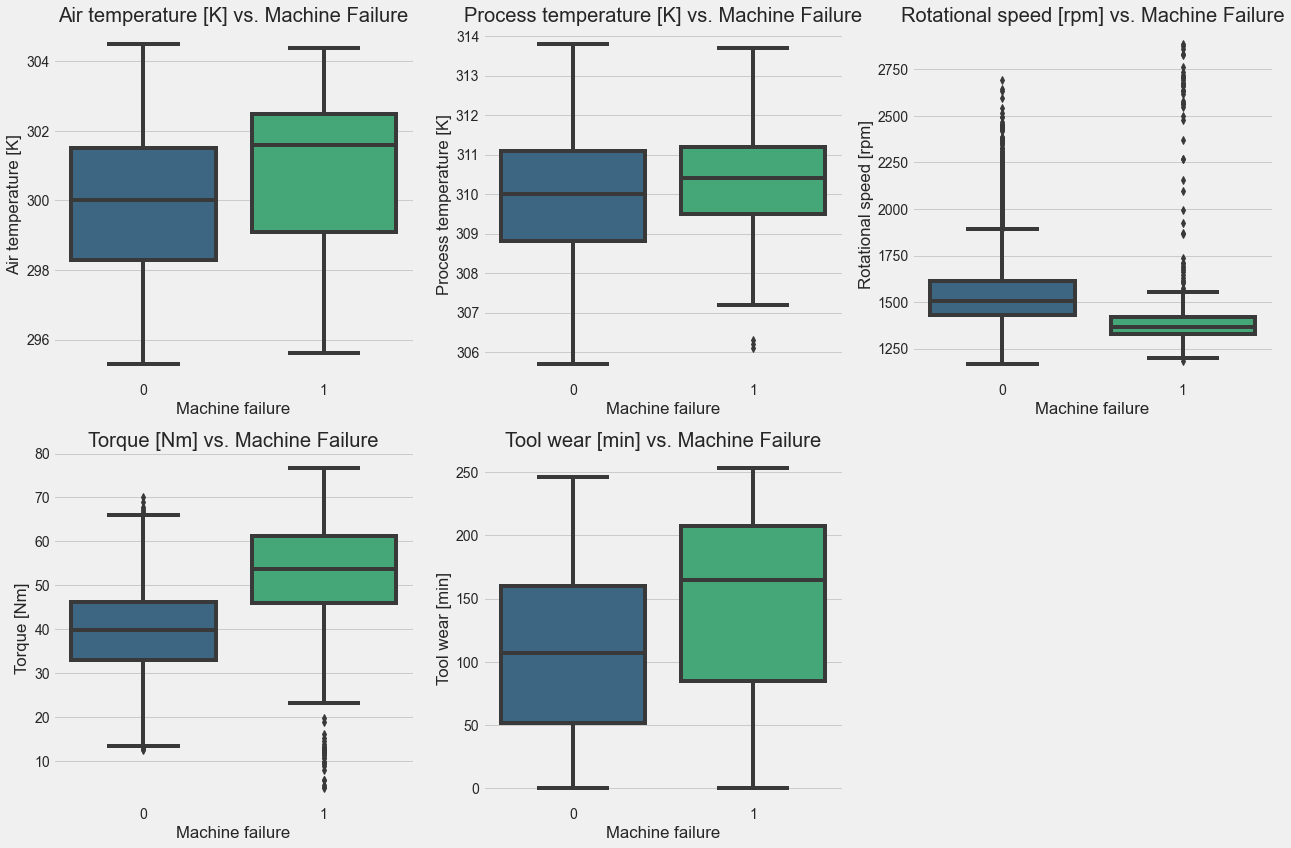

In [10]:
# 选择数值型列
numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# 创建一个画布来组织图表
plt.figure(figsize=(18, 12))

# 为每个数值变量生成箱线图
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)  # 按2行3列排列图表
    sns.boxplot(data=df, x='Machine failure', y=feature, palette='viridis')
    plt.title(f'{feature} vs. Machine Failure')  # 标题保持英文以匹配变量名

plt.tight_layout()  # 调整布局避免元素重叠
plt.show()

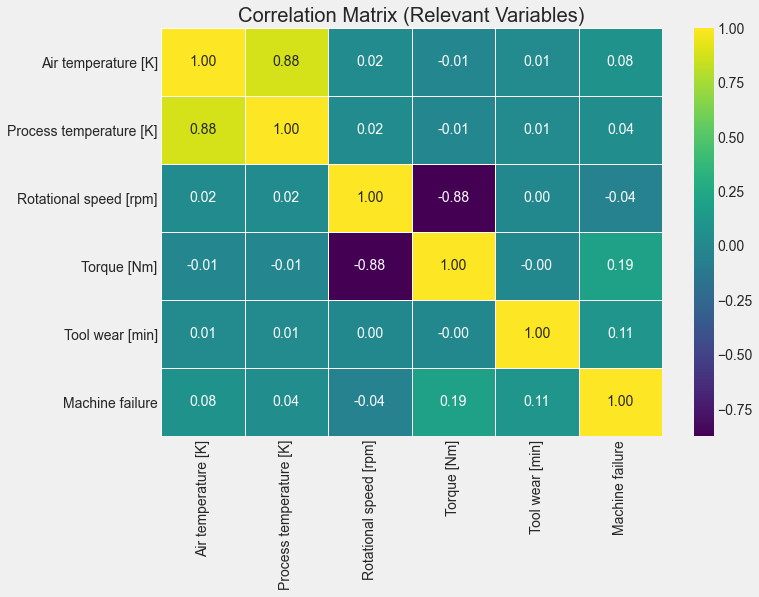

In [11]:
# 不需要的列
columnas_a_quitar = ['UDI', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# 创建图表画布
plt.figure(figsize=(10, 7))

# 计算相关矩阵（排除不必要的列）
# .drop() 方法会创建一个不包含这些列的临时数据框副本
corr_matrix = df.drop(columns=columnas_a_quitar).corr(numeric_only=True)

# 绘制热力图
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix (Relevant Variables)') 
plt.show()

In [79]:
# 创建用于模型的最终数据框，排除不必要的列
df_modelo = df.drop(columns=['Product ID', 'UDI', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'])

# 对'Type'列应用独热编码
df_modelo = pd.get_dummies(df_modelo, columns=['Type'], drop_first=True)

# 查看新数据框的前几行
print("新数据框的列：")
print(df_modelo.columns)
df_modelo.head()

新数据框的列：
Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'Type_L', 'Type_M'],
      dtype='object')


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,1,0
2,298.1,308.5,1498,49.4,5,0,1,0
3,298.2,308.6,1433,39.5,7,0,1,0
4,298.2,308.7,1408,40.0,9,0,1,0


In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

# ==========================================
# 1. 分离特征与标签
# ==========================================
X = df_modelo.drop('Machine failure', axis=1)
y = df_modelo['Machine failure']

# ==========================================
# 2. 定义一个通用函数：重采样 → 划分 → 标准化
# ==========================================
def make_dataset(resampler=None, test_size=0.2, random_state=42):
    """
    resampler: None 表示不重采样；可传入 SMOTE()、SMOTETomek() 等
    返回：X_train_scaled, X_test_scaled, y_train, y_test
    """
    if resampler is None:
        X_res, y_res = X, y
    else:
        X_res, y_res = resampler.fit_resample(X, y)

    # 划分训练集 / 测试集（stratify 保证类别比例）
    X_train, X_test, y_train, y_test = train_test_split(
        X_res, y_res,
        test_size=test_size,
        random_state=random_state,
        stratify=y_res,
        shuffle=True
    )

    # 标准化：只在训练集上 fit
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled  = scaler.transform(X_test)

    # 转回 DataFrame，保持列名
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
    X_test_scaled  = pd.DataFrame(X_test_scaled,  columns=X.columns)

    return X_train_scaled, X_test_scaled, y_train.reset_index(drop=True), y_test.reset_index(drop=True)

# ==========================================
# 3. 生成三组数据
# ==========================================
# 3.1 原始数据（无重采样）
X_train_orig, X_test_orig, y_train_orig, y_test_orig = make_dataset(resampler=None)

# 3.2 SMOTE 重采样
smote = SMOTE(random_state=42)
X_train_sm, X_test_sm, y_train_sm, y_test_sm = make_dataset(resampler=smote)

# 3.3 SMOTETomek 重采样
smote_tomek = SMOTETomek(random_state=42)
X_train_st, X_test_st, y_train_st, y_test_st = make_dataset(resampler=smote_tomek)

# ==========================================
# 4. 快速验证形状与类别分布
# ==========================================
def check(name, y_tr, y_te):
    print(f'--- {name} ---')
    print('train:', y_tr.value_counts().to_dict(),
          'test :', y_te.value_counts().to_dict())

check('Original', y_train_orig, y_test_orig)
check('SMOTE',    y_train_sm,   y_test_sm)
check('SMOTETomek', y_train_st, y_test_st)

--- Original ---
train: {0: 7729, 1: 271} test : {0: 1932, 1: 68}
--- SMOTE ---
train: {1: 7729, 0: 7728} test : {0: 1933, 1: 1932}
--- SMOTETomek ---
train: {0: 7662, 1: 7662} test : {0: 1916, 1: 1916}


In [81]:
# ==========================================
# 0. 定义清洗函数
# ==========================================
import re

def clean_feature_names(df: pd.DataFrame) -> pd.DataFrame:
    """
    原地清洗列名：移除 [ 及其内部所有字符（含 ]）
    例：'temp[10]' -> 'temp'；'press[2023]' -> 'press'
    """
    df.columns = [re.sub(r'\[.*?\]', '', str(col)) for col in df.columns]
    return df          # 其实原地修改，返回是为了链式调用

# ==========================================
# 1. 对 3 组数据分别清洗列名
# ==========================================
# 3.1 原始
X_train_orig = clean_feature_names(X_train_orig)
X_test_orig  = clean_feature_names(X_test_orig)

# 3.2 SMOTE
X_train_sm = clean_feature_names(X_train_sm)
X_test_sm  = clean_feature_names(X_test_sm)

# 3.3 SMOTETomek
X_train_st = clean_feature_names(X_train_st)
X_test_st  = clean_feature_names(X_test_st)

# ==========================================
# 2. 重新组装 data_sets
# ==========================================
data_sets = [
    {
        'name': 'Original',
        'X_train': X_train_orig,
        'y_train': y_train_orig,
        'X_test':  X_test_orig,
        'y_test':  y_test_orig
    },
    {
        'name': 'SMOTE',
        'X_train': X_train_sm,
        'y_train': y_train_sm,
        'X_test':  X_test_sm,
        'y_test':  y_test_sm
    },
    {
        'name': 'SMOTETomek',
        'X_train': X_train_st,
        'y_train': y_train_st,
        'X_test':  X_test_st,
        'y_test':  y_test_st
    }
]

# ==========================================
# 3. 简单验证
# ==========================================
print('清洗后列名示例（SMOTETomek 训练集）：')
print(list(X_train_st.columns))

清洗后列名示例（SMOTETomek 训练集）：
['Air temperature ', 'Process temperature ', 'Rotational speed ', 'Torque ', 'Tool wear ', 'Type_L', 'Type_M']


In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (confusion_matrix, precision_score, recall_score, 
                             f1_score, roc_auc_score, roc_curve)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# 评估函数：计算指标+混淆矩阵

def evaluate_model(y_true, y_pred, y_pred_proba, model_name, data_type):
    from sklearn.metrics import accuracy_score        # <- 新增
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)         # <- 新增
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred_proba)

    print(f"\n--- {data_type} Data - {model_name} ---")
    print(f"Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1: {f1:.4f} | AUC: {auc:.4f}")

    # 混淆矩阵绘图
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'Fault'], yticklabels=['Normal', 'Fault'])
    plt.xlabel('Predicted Label'); plt.ylabel('True Label')
    plt.title(f'{data_type} - {model_name} Confusion Matrix')
    plt.show()

    return {
        'model': model_name, 'data_type': data_type,
        'accuracy': accuracy,                 # <- 新增
        'precision': precision, 'recall': recall, 'f1': f1, 'auc': auc,
        'y_pred_proba': y_pred_proba, 'best_params': None
    }

In [83]:
def get_model_params(data_name, y_train):
    pos_ratio = sum(y_train == 1) / len(y_train)
    is_balanced = pos_ratio > 0.4

    models_config = {
        
        'RandomForest': {
            'model': RandomForestClassifier(random_state=42),
            'params': {
                'n_estimators': [50, 100, 200],
                'max_depth': [None, 5, 10, 20],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 5],
                'class_weight': ['balanced'] if not is_balanced else [None, 'balanced']
            }
        },
        
        'LogisticRegression': {
            'model': LogisticRegression(random_state=42, max_iter=1000),
            'params': {
                'C': [0.001, 0.01, 0.1, 1, 10, 100],
                'class_weight': ['balanced'] if not is_balanced else [None, 'balanced']
            }
        },
        'SVM': {
            'model': SVC(random_state=42, probability=True),
            'params': {
                'C': [0.01, 0.1, 1, 10, 100],
                'kernel': ['rbf'],
                'gamma': ['scale', 'auto', 0.01, 0.1, 1],
                'class_weight': ['balanced'] if not is_balanced else [None, 'balanced']
            }
        },
        'DecisionTree': {
            'model': DecisionTreeClassifier(random_state=42),
            'params': {
                'max_depth': [None, 3, 5, 10, 20, 30],
                'min_samples_split': [2, 5, 10, 20],
                'min_samples_leaf': [1, 2, 5],
                'class_weight': ['balanced'] if not is_balanced else [None, 'balanced']
            }
        },
        'XGBoost': {
            'model': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
            'params': {
                'learning_rate': [0.001, 0.01, 0.1, 0.2],
                'n_estimators': [50, 100, 200, 300],
                'max_depth': [2, 3, 5, 7],
                'subsample': [0.8, 1.0],
                'scale_pos_weight': [sum(y_train == 0) / sum(y_train == 1)] if not is_balanced else [1]
            }
        },
        'MLP': {
            'model': MLPClassifier(random_state=42, max_iter=1000),
            'params': {
                'hidden_layer_sizes': [(32,), (64,), (128,), (32, 32), (64, 32)],
                'alpha': [0.0001, 0.001, 0.01],
                'learning_rate_init': [0.001, 0.01, 0.1]
            }
        }
    }
    return models_config

In [84]:
import matplotlib.pyplot as plt

# 设置英文字体
plt.rcParams["font.family"] = ["Times New Roman"]
plt.rcParams["font.size"] = 10  # 统一字体大小
plt.rcParams["axes.unicode_minus"] = False  # 确保负号正常显示


===== 开始处理 Original 数据 =====

训练 RandomForest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

--- Original Data - RandomForest ---
Accuracy: 0.9810 | Precision: 0.7586 | Recall: 0.6471 | F1: 0.6984 | AUC: 0.9629


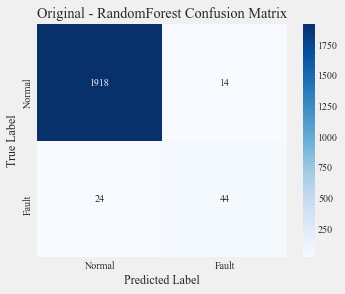


训练 LogisticRegression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits

--- Original Data - LogisticRegression ---
Accuracy: 0.8250 | Precision: 0.1421 | Recall: 0.8235 | F1: 0.2424 | AUC: 0.9070


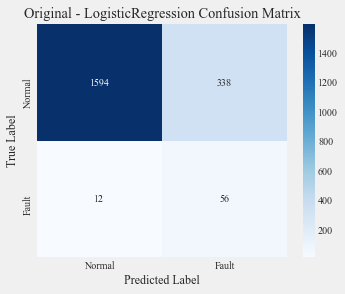


训练 SVM...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

--- Original Data - SVM ---
Accuracy: 0.9370 | Precision: 0.3253 | Recall: 0.7941 | F1: 0.4615 | AUC: 0.9600


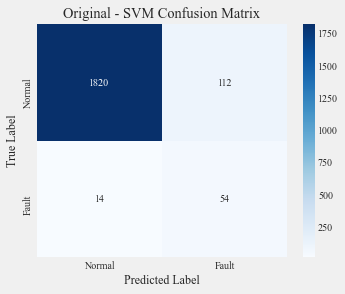


训练 DecisionTree...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

--- Original Data - DecisionTree ---
Accuracy: 0.9785 | Precision: 0.7119 | Recall: 0.6176 | F1: 0.6614 | AUC: 0.8044


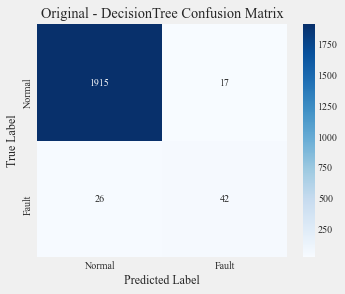


训练 XGBoost...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

--- Original Data - XGBoost ---
Accuracy: 0.9500 | Precision: 0.3933 | Recall: 0.8676 | F1: 0.5413 | AUC: 0.9734


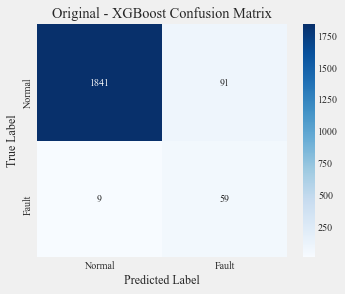


训练 MLP...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

--- Original Data - MLP ---
Accuracy: 0.9835 | Precision: 0.7692 | Recall: 0.7353 | F1: 0.7519 | AUC: 0.9822


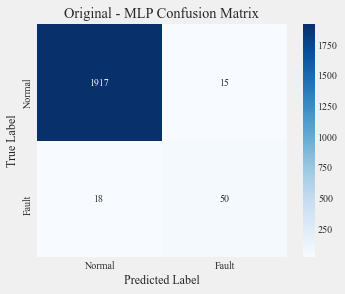


===== Original 数据的最优模型 =====
模型: MLP
最优F1分数: 0.7519
最优参数: {'learning_rate_init': 0.001, 'hidden_layer_sizes': (64, 32), 'alpha': 0.0001}

===== 开始处理 SMOTE 数据 =====

训练 RandomForest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

--- SMOTE Data - RandomForest ---
Accuracy: 0.9759 | Precision: 0.9646 | Recall: 0.9881 | F1: 0.9762 | AUC: 0.9975


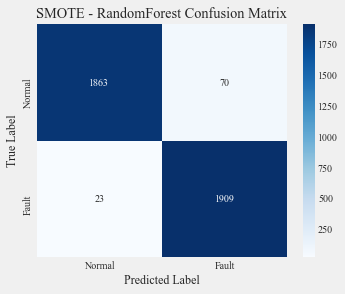


训练 LogisticRegression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

--- SMOTE Data - LogisticRegression ---
Accuracy: 0.8636 | Precision: 0.8688 | Recall: 0.8566 | F1: 0.8627 | AUC: 0.9331


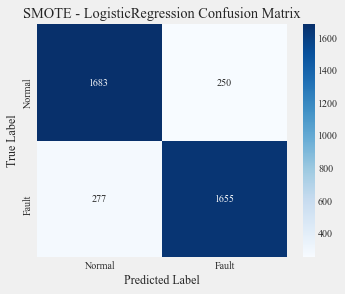


训练 SVM...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

--- SMOTE Data - SVM ---
Accuracy: 0.9692 | Precision: 0.9517 | Recall: 0.9886 | F1: 0.9698 | AUC: 0.9888


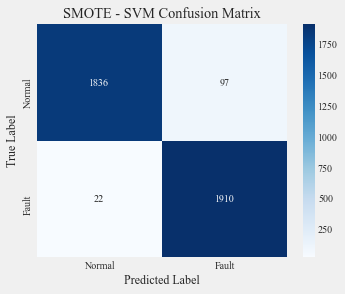


训练 DecisionTree...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

--- SMOTE Data - DecisionTree ---
Accuracy: 0.9646 | Precision: 0.9600 | Recall: 0.9695 | F1: 0.9647 | AUC: 0.9646


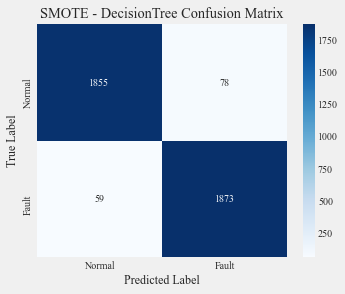


训练 XGBoost...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

--- SMOTE Data - XGBoost ---
Accuracy: 0.9576 | Precision: 0.9424 | Recall: 0.9746 | F1: 0.9583 | AUC: 0.9928


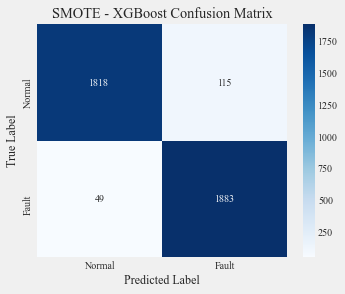


训练 MLP...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

--- SMOTE Data - MLP ---
Accuracy: 0.9682 | Precision: 0.9561 | Recall: 0.9814 | F1: 0.9686 | AUC: 0.9933


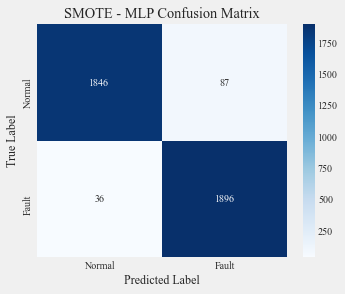


===== SMOTE 数据的最优模型 =====
模型: RandomForest
最优F1分数: 0.9762
最优参数: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'class_weight': 'balanced'}

===== 开始处理 SMOTETomek 数据 =====

训练 RandomForest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

--- SMOTETomek Data - RandomForest ---
Accuracy: 0.9768 | Precision: 0.9682 | Recall: 0.9859 | F1: 0.9770 | AUC: 0.9980


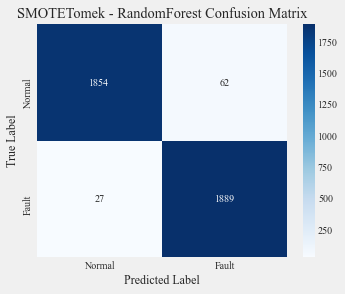


训练 LogisticRegression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

--- SMOTETomek Data - LogisticRegression ---
Accuracy: 0.8690 | Precision: 0.8596 | Recall: 0.8820 | F1: 0.8707 | AUC: 0.9408


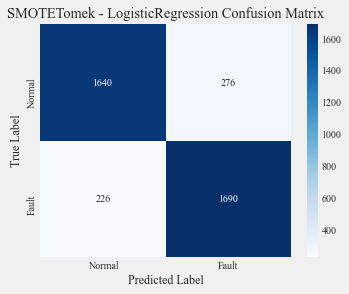


训练 SVM...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

--- SMOTETomek Data - SVM ---
Accuracy: 0.9713 | Precision: 0.9584 | Recall: 0.9854 | F1: 0.9717 | AUC: 0.9927


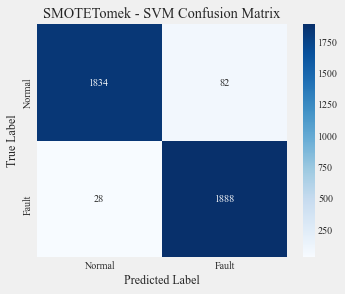


训练 DecisionTree...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

--- SMOTETomek Data - DecisionTree ---
Accuracy: 0.9666 | Precision: 0.9623 | Recall: 0.9713 | F1: 0.9668 | AUC: 0.9666


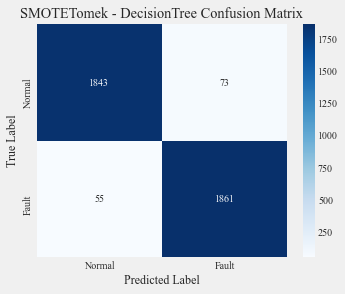


训练 XGBoost...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

--- SMOTETomek Data - XGBoost ---
Accuracy: 0.9603 | Precision: 0.9532 | Recall: 0.9682 | F1: 0.9606 | AUC: 0.9938


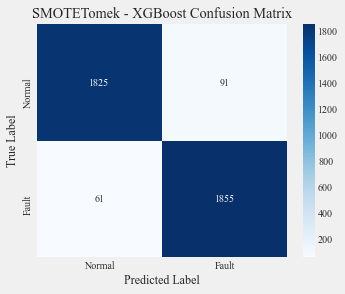


训练 MLP...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

--- SMOTETomek Data - MLP ---
Accuracy: 0.9736 | Precision: 0.9719 | Recall: 0.9755 | F1: 0.9737 | AUC: 0.9961


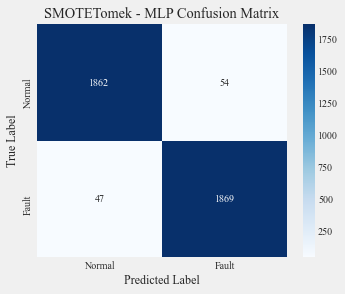


===== SMOTETomek 数据的最优模型 =====
模型: RandomForest
最优F1分数: 0.9770
最优参数: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'class_weight': 'balanced'}


In [85]:
#训练模型并筛选每组数据的最优模型
# data_sets = [原始数据, SMOTE数据, SMOTETomek数据]
# 每组数据格式: {'name': '原始', 'X_train': ..., 'y_train': ..., 'X_test': ...}

# 存储所有结果和最优模型
all_results = []
best_models_per_data = {}  # 键: 数据类型, 值: 该类型下的最优模型信息

for data in data_sets:
    data_name = data['name']
    X_train = data['X_train']
    y_train = data['y_train']
    X_test = data['X_test']
    y_test = data['y_test']  # 补充测试集标签（之前遗漏）
    
    print(f"\n===== 开始处理 {data_name} 数据 =====")
    models_config = get_model_params(data_name, y_train)  # 动态获取参数
    
    # 训练每个模型并记录结果
    data_results = []
    for model_name, config in models_config.items():
        print(f"\n训练 {model_name}...")
        # 10组参数+5折交叉验证，以F1为优化目标
        search = RandomizedSearchCV(
            config['model'],
            config['params'],
            n_iter=10,  # 10组参数
            cv=5,       # 5折交叉验证
            scoring='f1',
            random_state=42,
            n_jobs=-1,  # 并行加速
            verbose=1   # 显示训练进度
        )
        search.fit(X_train, y_train)
        best_model = search.best_estimator_
        
        # 预测与评估
        y_pred = best_model.predict(X_test)
        y_pred_proba = best_model.predict_proba(X_test)[:, 1]
        result = evaluate_model(y_test, y_pred, y_pred_proba, model_name, data_name)
        result['best_params'] = search.best_params_  # 记录最优参数
        data_results.append(result)
        all_results.append(result)
    
    # 筛选当前数据集的最优模型（按F1分数排序）
    data_results_sorted = sorted(data_results, key=lambda x: x['f1'], reverse=True)
    best_model = data_results_sorted[0]
    best_models_per_data[data_name] = best_model
    
    # 输出当前数据集的最优模型
    print(f"\n===== {data_name} 数据的最优模型 =====")
    print(f"模型: {best_model['model']}")
    print(f"最优F1分数: {best_model['f1']:.4f}")
    print(f"最优参数: {best_model['best_params']}")
    print("===================================")

In [86]:
# ==========================================
# 1. 引入依赖
# ==========================================
import pandas as pd
from datetime import datetime
import os

# ==========================================
# 2. 把 all_results 转成 DataFrame
#    每行 = 一个模型在一个数据集上的测试集表现
# ==========================================
summary_rows = []
for res in all_results:
    row = {
        'data_type': res['data_type'],
        'model': res['model'],
        'accuracy': res['accuracy'],
        'precision': res['precision'],
        'recall': res['recall'],
        'f1': res['f1'],
        'auc': res['auc'],
        'best_params': str(res['best_params'])  # dict 转字符串，方便存表
    }
    summary_rows.append(row)

df_summary = pd.DataFrame(summary_rows)

# 按常见习惯排序：先数据类型，再 F1 降序
df_summary = df_summary.sort_values(['data_type', 'f1'], ascending=[True, False])

# ==========================================
# 3. 保存文件（output 文件夹不存在则自动创建）
# ==========================================
output_dir = 'output'
os.makedirs(output_dir, exist_ok=True)

time_suffix = datetime.now().strftime('%Y%m%d_%H%M%S')
csv_path  = os.path.join(output_dir, f'models_comparison_{time_suffix}.csv')
excel_path = os.path.join(output_dir, f'models_comparison_{time_suffix}.xlsx')

df_summary.to_csv(csv_path, index=False)
df_summary.to_excel(excel_path, index=False)

print('>>> 结果已保存至：')
print('CSV :', csv_path)
print('Excel:', excel_path)

# ==========================================
# 4. 控制台打印最宽表格
# ==========================================
print('\n>>> 汇总表（按 F1 降序）：')
# 设置打印选项，防止列被折叠
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 25)  # 参数列不要太宽
print(df_summary)

>>> 结果已保存至：
CSV : output\models_comparison_20251027_194427.csv
Excel: output\models_comparison_20251027_194427.xlsx

>>> 汇总表（按 F1 降序）：
     data_type               model  accuracy  precision    recall        f1  \
5     Original                 MLP  0.983500   0.769231  0.735294  0.751880   
0     Original        RandomForest  0.981000   0.758621  0.647059  0.698413   
3     Original        DecisionTree  0.978500   0.711864  0.617647  0.661417   
4     Original             XGBoost  0.950000   0.393333  0.867647  0.541284   
2     Original                 SVM  0.937000   0.325301  0.794118  0.461538   
1     Original  LogisticRegression  0.825000   0.142132  0.823529  0.242424   
6        SMOTE        RandomForest  0.975938   0.964629  0.988095  0.976221   
8        SMOTE                 SVM  0.969211   0.951669  0.988613  0.969789   
11       SMOTE                 MLP  0.968176   0.956127  0.981366  0.968582   
9        SMOTE        DecisionTree  0.964554   0.960021  0.969462  0.964718

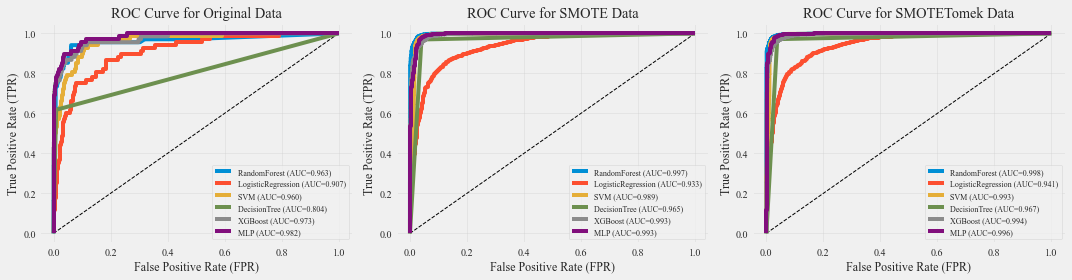

In [88]:
# 假设 data_sets 顺序与 best_models_per_data 键顺序一致
# 先建立“data_type -> 当前测试标签”的映射
y_test_map = {data['name']: data['y_test'] for data in data_sets}

plt.figure(figsize=(15, 4))
for i, data_type in enumerate(best_models_per_data.keys()):
    plt.subplot(1, 3, i + 1)
    plt.plot([0, 1], [0, 1], 'k--', lw=1)

    data_results = [r for r in all_results if r['data_type'] == data_type]
    y_true_cur = y_test_map[data_type]          # 取出当前测试标签
    for res in data_results:
        # 直接利用当前测试标签绘图
        fpr, tpr, _ = roc_curve(y_true_cur, res['y_pred_proba'])
        plt.plot(fpr, tpr, label=f"{res['model']} (AUC={res['auc']:.3f})")

    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'ROC Curve for {data_type} Data')
    plt.legend(fontsize=8)
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

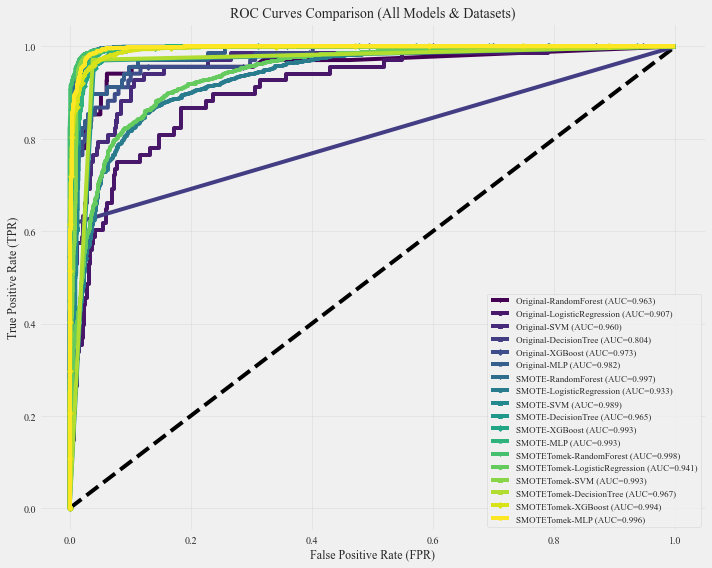

In [90]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np

# 1. 建立“data_type → 当前测试标签”映射（零改动原函数）
y_test_map = {data['name']: data['y_test'] for data in data_sets}

plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--')          # 随机基准线

num_curves = len(all_results)
colors = plt.cm.viridis(np.linspace(0, 1, num_curves))

model_markers = {
    'LogisticRegression': 'o',
    'SVM': 's',
    'DecisionTree': '^',
    'XGBoost': 'D',
    'MLP': 'p',
    'RandomForest': 'v'   # <- 新增
}
# 2. 绘制 ROC：用映射里的标签，保证长度一致
for i, res in enumerate(all_results):
    data_type = res['data_type']
    model_name = res['model']
    y_true_cur = y_test_map[data_type]                       # ← 关键
    fpr, tpr, _ = roc_curve(y_true_cur, res['y_pred_proba'])

    plt.plot(fpr, tpr,
             color=colors[i],
             marker=model_markers[model_name],
             markersize=4,
             markevery=50,
             label=f"{data_type}-{model_name} (AUC={res['auc']:.3f})")

plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC Curves Comparison (All Models & Datasets)', fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=9, loc='lower right')
plt.tight_layout()
plt.show()

In [91]:
# 汇总并打印每组数据的最优模型信息
summary = []
for data_type, best_model in best_models_per_data.items():
    summary.append({
        '数据类型': data_type,
        '最优模型': best_model['model'],
        'F1分数': best_model['f1'],
        'AUC': best_model['auc'],
        '精确率': best_model['precision'],
        '召回率': best_model['recall'],
        '最优参数': str(best_model['best_params'])
    })

# 转换为DataFrame并显示
summary_df = pd.DataFrame(summary)
print("\n===== 各组数据最优模型汇总 =====")
print(summary_df.round(4))


===== 各组数据最优模型汇总 =====
         数据类型          最优模型    F1分数     AUC     精确率     召回率  \
0    Original           MLP  0.7519  0.9822  0.7692  0.7353   
1       SMOTE  RandomForest  0.9762  0.9975  0.9646  0.9881   
2  SMOTETomek  RandomForest  0.9770  0.9980  0.9682  0.9859   

                       最优参数  
0  {'learning_rate_init'...  
1  {'n_estimators': 50, ...  
2  {'n_estimators': 50, ...  


In [92]:
# ==========================================
# ① 建立“数据类型 → 训练/测试”映射
# ==========================================
data_dict = {d['name']: {'X_train': d['X_train'],
                         'y_train': d['y_train'],
                         'X_test':  d['X_test'],
                         'y_test':  d['y_test']} for d in data_sets}

# ==========================================
# ② 精细化参数网格（示例）
# ==========================================
fine_params = {
    'MLP': {
        'hidden_layer_sizes': [(64,), (128,), (256,), (64,64), (128,64)],
        'alpha': [0.0001, 0.0005, 0.001, 0.005],
        'learning_rate_init': [0.0005, 0.001, 0.005, 0.01],
        'max_iter': [1500]
    },
    'RandomForest': {
        'n_estimators': [200, 300, 500],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'class_weight': ['balanced']
    }
}

# ==========================================
# ③ 对三条最优记录逐条精细化
# ==========================================
new_best = []          # 存放新结果
for row in summary_df.itertuples(index=False):
    data_type = row.数据类型
    best_model_name = row.最优模型
    print(f"\n>>> 精细化调参：{data_type} - {best_model_name}")

    X_train = data_dict[data_type]['X_train']
    y_train = data_dict[data_type]['y_train']
    X_test  = data_dict[data_type]['X_test']
    y_test  = data_dict[data_type]['y_test']

    # 选择模型类
    if best_model_name == 'MLP':
        from sklearn.neural_network import MLPClassifier
        model = MLPClassifier(random_state=42, early_stopping=True,
                              validation_fraction=0.1, max_iter=1500)
    else:  # RandomForest
        from sklearn.ensemble import RandomForestClassifier
        model = RandomForestClassifier(random_state=42)

    # GridSearchCV 精细搜索（可用 RandomizedSearchCV 加速）
    from sklearn.model_selection import GridSearchCV
    grid = GridSearchCV(model, fine_params[best_model_name],
                        cv=5, scoring='f1', n_jobs=-1, verbose=1)
    grid.fit(X_train, y_train)

    # 评估
    y_pred = grid.predict(X_test)
    y_prob = grid.predict_proba(X_test)[:, 1]
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    new_res = {
        '数据类型': data_type,
        '最优模型': best_model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1分数': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_prob),
        '最优参数': str(grid.best_params_)
    }
    new_best.append(new_res)

# ==========================================
# ④ 打印新最优表
# ==========================================
new_df = pd.DataFrame(new_best)
print("\n===== 精细化调参后最优结果 =====")
print(new_df.round(4))


>>> 精细化调参：Original - MLP
Fitting 5 folds for each of 80 candidates, totalling 400 fits

>>> 精细化调参：SMOTE - RandomForest
Fitting 5 folds for each of 108 candidates, totalling 540 fits

>>> 精细化调参：SMOTETomek - RandomForest
Fitting 5 folds for each of 108 candidates, totalling 540 fits

===== 精细化调参后最优结果 =====
         数据类型          最优模型  Accuracy  Precision  Recall    F1分数     AUC  \
0    Original           MLP    0.9745     0.6977  0.4412  0.5405  0.9600   
1       SMOTE  RandomForest    0.9777     0.9666  0.9896  0.9780  0.9982   
2  SMOTETomek  RandomForest    0.9799     0.9728  0.9875  0.9801  0.9985   

                       最优参数  
0  {'alpha': 0.001, 'hid...  
1  {'class_weight': 'bal...  
2  {'class_weight': 'bal...  



>>> SHAP 特征重要性 — Original - MLP


  0%|          | 0/2000 [00:00<?, ?it/s]

                feature  importance
3               Torque       0.1544
4            Tool wear       0.0996
2     Rotational speed       0.0592
0      Air temperature       0.0539
6                Type_M      0.0521
5                Type_L      0.0312
1  Process temperature       0.0233


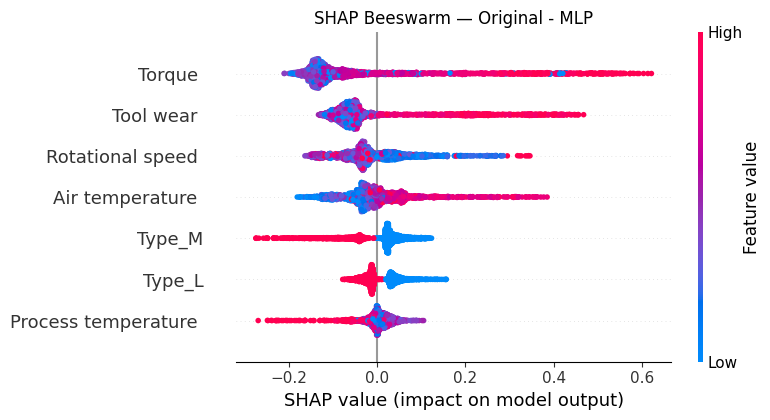

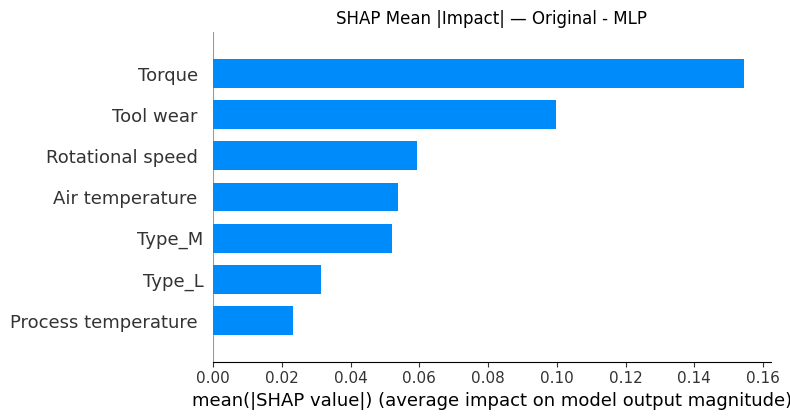


>>> SHAP 特征重要性 — SMOTE - RandomForest
                feature  importance
3               Torque       0.1675
2     Rotational speed       0.1465
4            Tool wear       0.1361
0      Air temperature       0.0685
6                Type_M      0.0513
5                Type_L      0.0365
1  Process temperature       0.0314


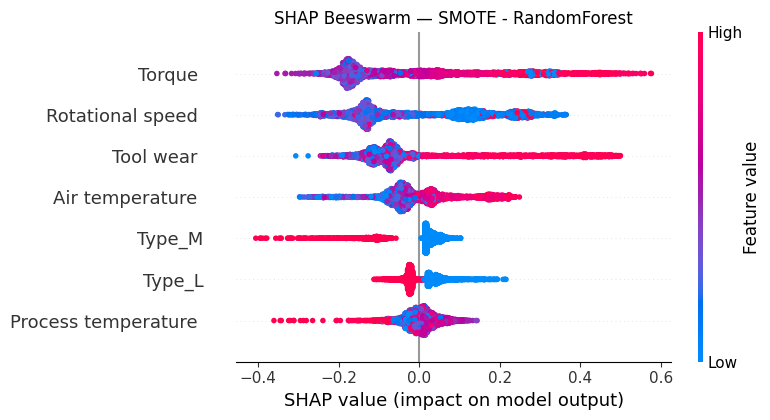

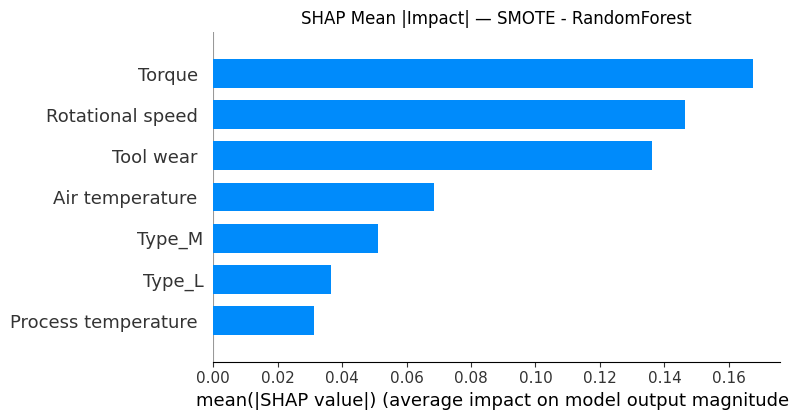


>>> SHAP 特征重要性 — SMOTETomek - RandomForest
                feature  importance
3               Torque       0.1657
2     Rotational speed       0.1443
4            Tool wear       0.1339
0      Air temperature       0.0681
6                Type_M      0.0511
5                Type_L      0.0363
1  Process temperature       0.0304


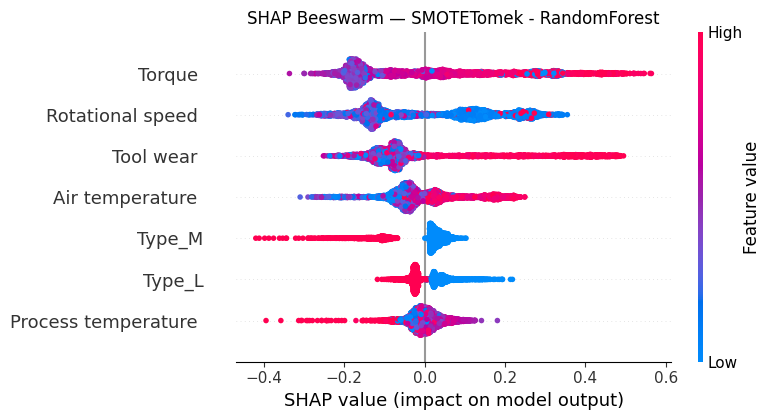

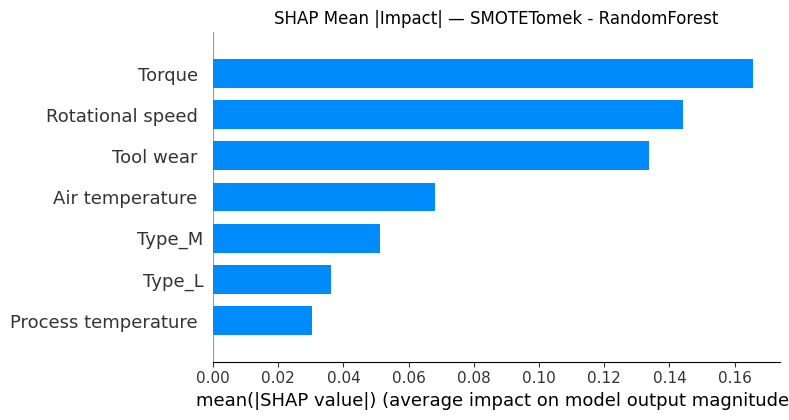

In [93]:
# ===========================================================
# ⑤ 基于 SHAP 输出最优模型的特征重要性 Top-K
# ===========================================================
import shap
import pandas as pd

TOP_K = 8   # 展示前 8 个特征

for idx, row in new_df.iterrows():
    data_type   = row['数据类型']
    model_name  = row['最优模型']
    print(f"\n>>> SHAP 特征重要性 — {data_type} - {model_name}")

    # 取出对应数据
    X_train = data_dict[data_type]['X_train']
    X_test  = data_dict[data_type]['X_test']
    y_test  = data_dict[data_type]['y_test']

    # 取出最优 estimator（GridSearchCV 的 best_estimator_）
    best_est = grid.best_estimator_   # 注意：grid 变量仍在循环作用域内
    # 若你担心循环变量被覆盖，可在 new_best.append 时把 best_est 一并存下来

    # ① 选择解释器
    if model_name == 'MLP':
        # MLP 用 KernelExplainer（模型无关）
        explainer = shap.KernelExplainer(best_est.predict_proba, X_train[:100])
    else:  # RandomForest
        # 树模型用 TreeExplainer（快速、精确）
        explainer = shap.TreeExplainer(best_est)

    # ② 计算 SHAP 值（全局解释用测试集即可）
    shap_values = explainer.shap_values(X_test)

    # 对于二分类，TreeExplainer 返回 list，正类 shap_values[1]
    if isinstance(shap_values, list):
        sv = shap_values[1]   # 正类
    else:
        sv = shap_values      # KernelExplainer 返回 ndarray

    # ③ 全局重要性 = |SHAP| 均值
    importance = pd.DataFrame({
        'feature': X_test.columns,
        'importance': np.abs(sv).mean(axis=0)
    }).sort_values('importance', ascending=False)

    # ④ 打印 Top-K
    print(importance.head(TOP_K).round(4))

    
        # ⑥ SHAP 可视化
    plt.style.use('default')
    # 1) 蜂巢图
    plt.figure(figsize=(6, 4))
    shap.summary_plot(sv, X_test, show=False)   # show=False 防止自动弹窗
    plt.title(f'SHAP Beeswarm — {data_type} - {model_name}')
    plt.tight_layout()
    plt.show()

    # 2) 条形图（全局均值）
    plt.figure(figsize=(6, 4))
    shap.summary_plot(sv, X_test, plot_type="bar", show=False)
    plt.title(f'SHAP Mean |Impact| — {data_type} - {model_name}')
    plt.tight_layout()
    plt.show()